In [15]:
import keras
import numpy as np
import pandas as pd
from PIL import Image, ImageFile
from keras.applications import vgg16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance
import time
import urllib.request
import io

from src.fetch_data_pipeline import extract_image_url, extract_df, download_images, load_RG_data, zip_lookup, gps_lookup
import json

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
model = vgg16.VGG16(include_top = True, weights = 'imagenet')

#remove the classification layer (fc8) softmax?
model.layers.pop()

#remove the next fully connected layer (fc7)
model.layers.pop()

#fix the output of the model
model.outputs = [model.layers[-1].output]

#Stripped down model with 4096 category output

PIL image size (224, 224)


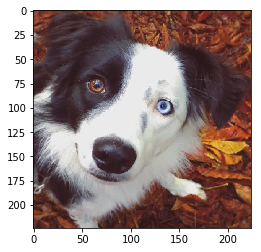

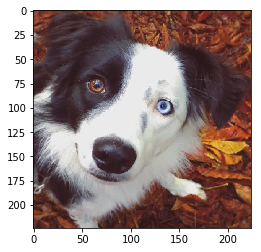

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


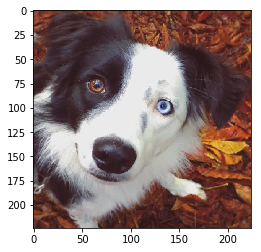

In [35]:
#filename_a = 'data/aww.png'
filename_a = 'data/test1.png'
#filename_a = 'data/test2.png'
#filename_a = 'data/test3.png'
#filename_a = 'data/mossy1.png'
#filename_a = 'data/Nibu.png'
#filename_a = 'data/dyno.png'
#filename_a = 'data/cool.png'

# Load image in PIL format
original_a = load_img(filename_a, target_size=(224, 224))
print('PIL image size', original_a.size)
plt.imshow(original_a)
plt.show()
 
# Convert PIL image to NumPy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image_a = img_to_array(original_a)
plt.imshow(np.uint8(numpy_image_a))
plt.show()
print('numpy array size',numpy_image_a.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch_a = np.expand_dims(numpy_image_a, axis=0)
print('image batch size', image_batch_a.shape)
plt.imshow(np.uint8(image_batch_a[0]))

In [36]:
# prepare the image for the VGG model
#processed_image = vgg16.preprocess_input(image_batch.copy())
processed_image_a = vgg16.preprocess_input(image_batch_a.copy())
#processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
#predictions = model.predict(processed_image)
predictions_a = model.predict(processed_image_a)
# print predictions
 
#print(predictions)
print(predictions_a)
    
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
#label = decode_predictions(predictions)
#print(label)

[[0. 0. 0. ... 0. 0. 0.]]


In [37]:
durka = predictions_a

In [20]:
feature_array_4750 = np.load('web/static/temp/data/doggie_features_4750.npy')

In [38]:
#Calculate cosine similarity
results = []

for feature_array in feature_array_4750:
    cosine_score = distance.cosine(feature_array.flatten(), durka.flatten())
    results.append(cosine_score)

In [22]:
combined_df, combined_imgs = load_RG_data()

Total Records:  49755
Total Images:  143562


In [39]:
dog_url = combined_df.ImageUrl[0:4750]
zipped_dogs = list(zip(dog_url.tolist(),results))
sorted_zipped_dogs = sorted(zipped_dogs, key = lambda t: t[1])
top_10 = sorted_zipped_dogs[0:11]
#top_10

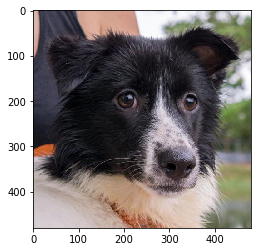

0.532901406288147


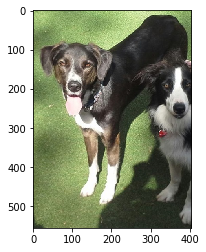

0.5230633616447449


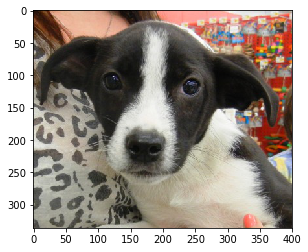

0.5200767517089844


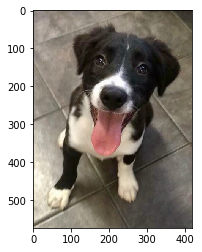

0.4821292757987976


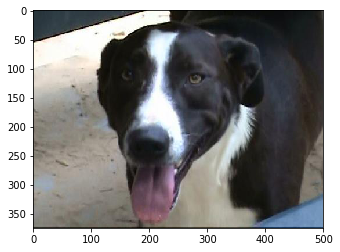

0.44745615124702454


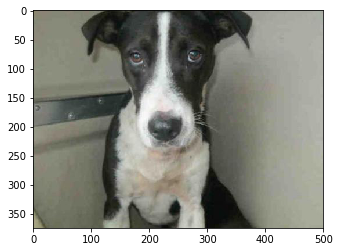

0.4421564042568207


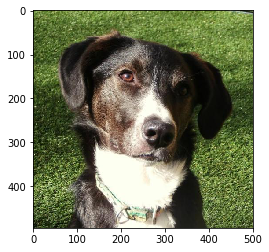

0.441975474357605


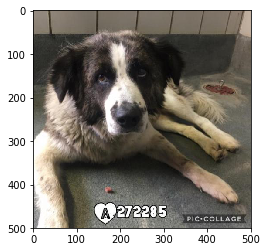

0.4385989308357239


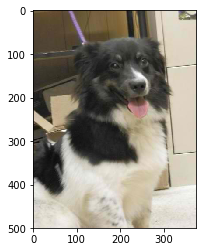

0.4334954619407654


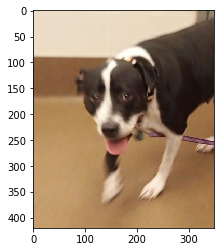

0.4302551746368408


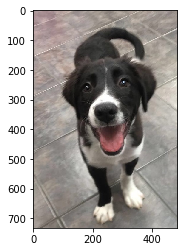

0.4280872046947479


In [40]:
for image, score in top_10:
    plt.imshow(load_img('/Users/bil2ab/galvanize/RG5kimages/'+image.split('/')[-1]))
    plt.show()
    print(1-score)

In [ ]:
#Save list of feature arrays as numpy data file
doggie = np.asarray(feature_array_list)
np.save('web/static/temp/data/doggie_features_4750', doggie)

In [ ]:
#Save csv of image urls
dog_url = combined_df.ImageUrl[0:4750]
dog_url.to_csv('web/static/temp/data/img_urls.csv')

In [ ]:
#Load NumPy data file of 4750 dogs and calculate average number of non-zero features in 1D arrays for all dogs

non_zero_features = []
feature_array_4750 = np.load('web/static/temp/data/doggie_features_4750.npy')

for dog in feature_array_4750:
    non_zero_features.append(len(np.where(dog>0)[1]))

plt.hist(non_zero_features)

In [ ]:
max(non_zero_features)

In [ ]:
def vectorize_dog_images(image_path_list, length=25):
    '''
    Take collection of dog images and vectorize each image to a 1D NumPy array. 
    INPUT: List, Pandas Series, some iterable of filepaths to dog images (strings)
    OUTPUT: Returns feature array list
    '''
    start = time.time()
    feature_array_list = []
    #image_path_list formerly combined_df.ImageUrl[0:4750]
    for url in image_path_list[0:length]:
        image_path = 'data/images/'+url.split('/')[-1]
        dog = load_img(image_path, target_size=(224, 224))
        numpy_image = img_to_array(dog)
        image_batch = np.expand_dims(numpy_image, axis=0)  
        processed_image = vgg16.preprocess_input(image_batch.copy())
        feature_array = model.predict(processed_image)
        feature_array_list.append(feature_array)
    end = time.time()
    print(end - start)
    return feature_array_list

In [ ]:
#max(predictions.flatten())
avg_predict_val = sum(predictions.flatten())/len(predictions.flatten())
#predictions.size
predictions

In [ ]:
start = time.time()
url = 'https://s3.amazonaws.com/filestore.rescuegroups.org/704/pictures/animals/6482/6482925/38852933_500x375.jpg'
result = img_to_array(url)
end = time.time()
print(end - start)
#dog = load_img(url, target_size=(224, 224))
#plt.imshow(dog)
#plt.show()

'''

URL = 'https://s3.amazonaws.com/filestore.rescuegroups.org/704/pictures/animals/6482/6482925/38852933_500x375.jpg'

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f)

plt.imshow(img)
plt.show()

'''


#b = np.unpackbits(predictions, axis=1)
#is this a valid way to convert a numpy array to a binary array? Need it to calculate Hamming distance.
a = np.where(predictions > avg_predict_val, 1, 0)
a



feature_array_list[1] == what[1]

In [ ]:
model = vgg16.VGG16(include_top = True, weights = 'imagenet')
model.layers.pop()
model.layers.pop()
model.outputs = [model.layers[-1].output]

In [ ]:
def img_to_array(url):
    
    model = vgg16.VGG16(include_top = True, weights = 'imagenet')
    # Remove the classification layer (fc8) softmax
    model.layers.pop()
    # Remove the next fully connected layer (fc7)
    model.layers.pop()
    # Modify output of the model
    model.outputs = [model.layers[-1].output]
    
    # Fetch image from url
    with urllib.request.urlopen(url) as url:
        f = io.BytesIO(url.read())
    img = Image.open(f)
    dog = img.resize((224, 224)) #image.ANTIALIAS resampling optional for PIL method
    #Load image and resize
    #dog = load_img(img, target_size=(224, 224))
    #plt.imshow(original)
    #plt.show()
    # Convert to numpy array
    numpy_image = img_to_array(dog)
    #plt.imshow(np.uint8(numpy_image))
    #plt.show()
    #print('numpy array size',numpy_image.shape)
    # Convert into batch format
    image_batch = np.expand_dims(numpy_image, axis=0)
    #print('image batch size', image_batch.shape)
    #plt.imshow(np.uint8(image_batch[0]))

    # Prepare image for model
    processed_image = vgg16.preprocess_input(image_batch.copy())
    # Get 1D numpy array with 4096 attributes
    return model.predict(processed_image).flatten()

In [ ]:
from scipy.spatial import distance

score_cos = distance.cosine(predictions.flatten(), predictions_a.flatten())
score_braycurtis = distance.braycurtis(predictions.flatten(), predictions_a.flatten())
score_canberra = distance.canberra(predictions.flatten(), predictions_a.flatten())
score_cheb = distance.chebyshev(predictions.flatten(), predictions_a.flatten())
score_euclid = distance.euclidean(predictions.flatten(), predictions_a.flatten())
score_manhattan = distance.cityblock(predictions.flatten(), predictions_a.flatten())

score_list = [score_cos, score_braycurtis, score_cheb, score_canberra, score_euclid, score_manhattan]
score_list

In [ ]:
filename = 'data/images/59442765_500x625.jpg'

#im = Image.open(filename)
#im.rotate(-90).show()
#rotate_image(filename)

# Load image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
 
# Convert PIL image to NumPy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [ ]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
#inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
#resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
#mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [ ]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
#processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)

In [ ]:
#Function to extract exif data from smartphone image and view in nice format

from PIL.ExifTags import TAGS

#def extract_image_data(file):
filename =''
im = PIL.Image.open(filename)
exifdict = im._getexif()
#print(exifdict)

if len(exifdict):
    for k in exifdict.keys():
        if k in TAGS.keys():
            print(TAGS[k], exifdict[k])
        else:
            print(k, exifdict[k])

In [ ]:
'''
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='linear', name='bottleneck'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=784, activation='hard_sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
'''